In [19]:
run Lattice_functions.ipynb

In [20]:
Lat_Obj = Rect_Lattice(10, 10, 1, 1, 10, [1, 10, 91, 100], [1, 10, 91, 100], [1, 10, 91, 100])
Lat_Obj = add_braces_to_rectangular_lattice(Lat_Obj, 10, '|')
xp = range(1, len(Lat_Obj.springs) + 1)
for i in xp:
    Lat_Obj.springs[i - 1].l0 = 1.1

In [21]:
def Energy(Coordinates):
    nNodes = int(len(Coordinates)/3)
    x_vec = []
    y_vec = []
    z_vec = []
    
    for i in range(0, nNodes):
        x_vec.insert(i, Coordinates[i])
        y_vec.insert(i, Coordinates[i + nNodes])
        z_vec.insert(i, Coordinates[i + (2*nNodes)])
        
    energy = 0    
    for i in Lat_Obj.springs:
        energy = energy + (0.5*(i.k)*((Length(x_vec[i.i - 1], y_vec[i.i - 1], z_vec[i.i - 1], x_vec[i.j - 1], y_vec[i.j - 1], z_vec[i.j - 1]) - i.l0)**2))
    return energy

In [22]:
x0 = []
y0 = []
z0 = []
for i in Lat_Obj.nodes:
    x0.insert((i.n - 1), i.x)
    y0.insert((i.n - 1), i.y)
    z0.insert((i.n - 1), i.z)
    
coord0 = x0 + y0 + z0
nNodes = int(len(coord0)/3)

In [23]:
lb = -np.inf*np.ones(len(coord0))
ub = np.inf*np.ones(len(coord0))

for i in Lat_Obj.support_x:
    lb[i - 1] = x0[i - 1]
    ub[i - 1] = x0[i - 1]

for i in Lat_Obj.support_y:
    lb[nNodes + i - 1] = y0[i - 1]
    ub[nNodes + i - 1] = y0[i - 1]
    
for i in Lat_Obj.support_z:
    lb[(2*nNodes) + i - 1] = z0[i - 1]
    ub[(2*nNodes) + i - 1] = z0[i - 1]


bounds = Bounds(lb, ub)

In [24]:
x0 = coord0
>>> res = minimize(Energy, x0, method='trust-constr', options={'verbose': 1}, bounds=bounds)

`xtol` termination condition is satisfied.
Number of iterations: 219, function evaluations: 65919, CG iterations: 1509, optimality: 1.43e-06, constraint violation: 0.00e+00, execution time: 1.5e+02 s.


In [25]:
result = res.x

In [26]:
x = result[0 : nNodes]
y = result[nNodes : 2*nNodes]
z = result[2*nNodes : 3*nNodes]

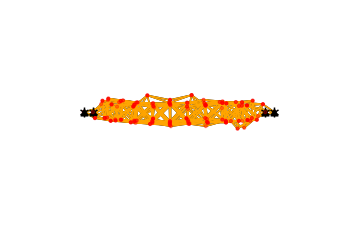

In [29]:
ax = Lattice_Plot(x, y, z, Lat_Obj, xp, 'YZ')